# Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

#XGBoost
import xgboost as xgb
from xgboost import plot_importance

#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# basic NN
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier


# Upsampling
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# Shorten Phrase

Change name of columns:

sym -> company

DATE -> year

Property, Plant And Equipment, Total - Gross -> PPE Total Gross

Property/Plant/Equipment, Total - Net -> PPE Total Net

Selling/General/Administrative Expense, Total -> SGAE

Gross Profit Margin, Industrial & Utility, % -> Gross Profit Margin

Income Aft Tax Margin, % -> Income Aft Tax Margin

Total Receivables, Net -> Total Receivable

Total Assets, Reported -> Total Assets

Accounts Receivable - Trade, Net -> Accounts Receivable

Depreciation / Depletion, Cumulative -> Depreciation

# Data visualization

In [2]:
df = pd.read_excel("C:/Users/flori/OneDrive/Máy tính/do_an_thu_ha/data.xlsx")

In [3]:
df.describe()

,date,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,Total Equity,Total Revenue,Inventory Turnover,Fixed Asset Turnover,"WC/Sales, Period-Period Diff",Depreciation,Revenue,Long Term Investments,Date Became Public,Organization Founded Year
count,3140,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,...,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3140,3140.000000
mean,2019-05-10 18:15:35.541401600,2018.371338,3.808130e+12,3.228502e+12,2.236834e+12,2.859030e+12,4.338854e+11,3.733876e+11,3.232193e+03,1.139943,...,2.764724e+12,5.008202e+12,4.546382e+03,175.401819,0.291643,1.970223e+11,5.008210e+12,6.567091e+11,2012-01-01 03:59:50.828025600,2001.835350
min,2012-12-31 00:00:00,2012.000000,1.060151e+10,0.000000e+00,0.000000e+00,1.545590e+08,-1.113534e+12,-1.290712e+13,-1.488362e+04,0.001083,...,-1.746187e+13,1.796862e+09,-1.113968e-01,0.022256,-35085.349778,-1.075282e+09,1.796862e+09,-1.790382e+10,2000-07-28 00:00:00,1975.000000
25%,2016-12-31 00:00:00,2016.000000,3.034037e+11,9.146206e+10,5.376601e+10,1.568569e+11,2.890716e+10,1.399113e+10,5.810480e+01,0.408405,...,2.467907e+11,3.963046e+11,2.437001e+00,1.967501,-3.923132,7.143676e+09,3.963046e+11,1.007959e+10,2008-02-15 00:00:00,1998.000000
50%,2019-12-31 00:00:00,2019.000000,8.130518e+11,3.725002e+11,2.090415e+11,5.425294e+11,7.962913e+10,5.017335e+10,1.243384e+02,0.840292,...,5.989872e+11,1.081180e+12,4.584489e+00,4.916804,0.683845,2.448779e+10,1.081180e+12,5.245222e+10,2010-04-21 00:00:00,2003.500000
75%,2021-12-31 00:00:00,2021.000000,2.488827e+12,1.357102e+12,8.281436e+11,1.707083e+12,2.348496e+11,1.831017e+11,2.389878e+02,1.432336,...,1.581918e+12,3.321146e+12,1.169884e+01,14.028112,6.739671,8.465440e+10,3.321146e+12,2.292746e+11,2016-05-10 00:00:00,2007.000000
max,2023-12-31 00:00:00,2023.000000,3.426092e+14,2.621844e+14,2.233643e+14,3.866695e+14,2.713216e+13,3.882456e+13,3.433327e+06,15.176504,...,1.790350e+14,3.040638e+14,8.799547e+06,241702.374338,23614.460016,2.128407e+13,3.040638e+14,5.346307e+13,2023-11-09 00:00:00,2019.000000
std,NaN,2.984457,1.399373e+13,1.295678e+13,1.012349e+13,1.328121e+13,1.708849e+12,1.829165e+12,8.491180e+04,1.218228,...,8.914615e+12,1.608562e+13,1.641936e+05,5422.693744,1070.390964,8.171665e+11,1.608562e+13,3.031081e+12,NaN,7.172517


In [4]:
df = df.drop(columns=['date', 'Company Common Name', 'Exchange Name', 'Date Became Public', 'Organization Founded Year'])
df.head()

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,Notes Payable/Short Term Debt,Total Equity,Total Revenue,Inventory Turnover,Fixed Asset Turnover,"WC/Sales, Period-Period Diff",Depreciation,Revenue,Long Term Investments,TRBC Industry Name
0,POM.HM,2013,3959029499670,4887240391770,3274346376730,3820969092980,138621600960,-193307320820,140.817493,1.213669,...,3071990381090,2389503414130,9891226461080,4.476189,2.891494,-2.001508,320035834910,9891226461080,9402985380,Iron & Steel
1,POM.HM,2014,6151052752300,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,5313725798370,2339831797850,10804878879950,3.644882,3.399511,-1.263329,322625839870,10804878879950,11402985380,Iron & Steel
2,POM.HM,2015,4234739302840,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,3616793582860,2367319295100,9807578644920,3.175598,3.344260,-0.421230,323041991260,9807578644920,11402985380,Iron & Steel
3,POM.HM,2016,4441539818360,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,3453177432550,2668412968040,9296925643430,4.545066,3.547907,2.487572,262956171150,9296925643430,11402985380,Iron & Steel
4,POM.HM,2017,5153756368800,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,3485293231910,3364646637270,11369574627890,5.727948,4.795342,3.664946,240966710580,11369574627890,51500648890,Iron & Steel


In [5]:
distinct_companies = df['Company'].unique()
num_distinct_companies = len(distinct_companies)
print("Number of distinct values in the 'company' column:", num_distinct_companies)

for company in distinct_companies:
    print(company)

print("\nTotal distinct companies:", num_distinct_companies)

Number of distinct values in the 'company' column: 393
POM.HM
V21.HN
LIG.HN
TDC.HM
NVT.HM
VCM.HN
SPM.HM
DTL.HM
GDW.HN
PDN.HM
CMV.HM
BCE.HM
NHA.HM
AAA.HM
LDP.HN
DRH.HM
VRC.HM
HMH.HN
PDR.HM
PCT.HN
QCG.HM
SMB.HM
NET.HN
PTL.HM
OCH.HN
HAT.HN
TIG.HN
HQC.HM
TDW.HM
ARM.HN
KTT.HN
SCR.HM
CMX.HM
CMS.HN
EVE.HM
HTI.HM
BSC.HN
PPS.HN
HTL.HM
CLW.HM
MDG.HM
PTD.HN
NKG.HM
D11.HN
JVC.HM
PTB.HM
THG.HM
SVN.HN
SVT.HM
CNG.HM
BRC.HM
HHS.HM
LAS.HN
GAS.HM
DHM.HM
FCN.HM
SLS.HN
AGM.HM
HAR.HM
SHA.HM
NLG.HM
FCM.HM
PSD.HN
THS.HN
SCI.HN
CLL.HM
SKG.HM
MWG.HM
DGC.HM
TVC.HN
PEN.HN
CEO.HN
HVN.HM
QBS.HM
SFG.HM
CAV.HM
NCT.HM
VTJ.HN
HAH.HM
SGR.HM
FID.HN
PSW.HN
HNG.HM
BCG.HM
DGW.HM
PDB.HN
LDG.HM
VPS.HM
BFC.HM
CCR.HN
STK.HM
NAF.HM
DAT.HM
VGC.HM
VMS.HN
GEX.HM
MBG.HN
TFC.HN
HHV.HM
VSA.HN
TEG.HM
NAP.HN
KPF.HM
PPY.HN
CDN.HN
TDM.HM
CLM.HN
MST.HN
TIP.HM
HCD.HM
ADS.HM
HID.HM
CTP.HN
KSV.HN
DAH.HM
TCH.HM
MVB.HN
TTH.HN
BHN.HM
PC1.HM
SAB.HM
DTK.HN
NVL.HM
VIF.HN
DPG.HM
HKT.HN
DBD.HM
PIA.HN
VJC.HM
BAX.HN
GEG.HM
PLX.HM
C69.HN
SBV.HM
TCD.HM


In [6]:
company_frequency = df['Company'].value_counts()

print("Amount of samples of each company column:")
print(company_frequency)

Amount of samples of each company column:
Company
IJC.HM    11
VCC.HN    11
CDC.HM    11
VC6.HN    11
TTF.HM    11
          ..
TKG.HN     1
PTS.HN     1
VHE.HN     1
TVC.HN     1
TCR.HM     1
Name: count, Length: 393, dtype: int64


In [7]:
industry_frequency = df.groupby('TRBC Industry Name')['Company'].nunique()

print("Amount of unique industries for each company:")
print(industry_frequency)

Amount of unique industries for each company:
TRBC Industry Name
Advanced Medical Equipment & Technology    1
Advertising & Marketing                    1
Aerospace & Defense                        1
Agricultural Chemicals                     8
Airlines                                   2
                                          ..
Textiles & Leather Goods                   5
Tires & Rubber Products                    4
Tobacco                                    2
Toys & Children's Products                 1
Water & Related Utilities                  6
Name: Company, Length: 79, dtype: int64


In [8]:
# compute the percentage of missing values in each row
percent_missing = df.isna().sum(axis=1) / len(df.columns)

# compute the average percentage of missing values across all rows
avg_percent_missing = percent_missing.mean()

# print the results
print(f"Percentage of rows with missing values: {avg_percent_missing:.2%}")

Percentage of rows with missing values: 0.00%


<Axes: >

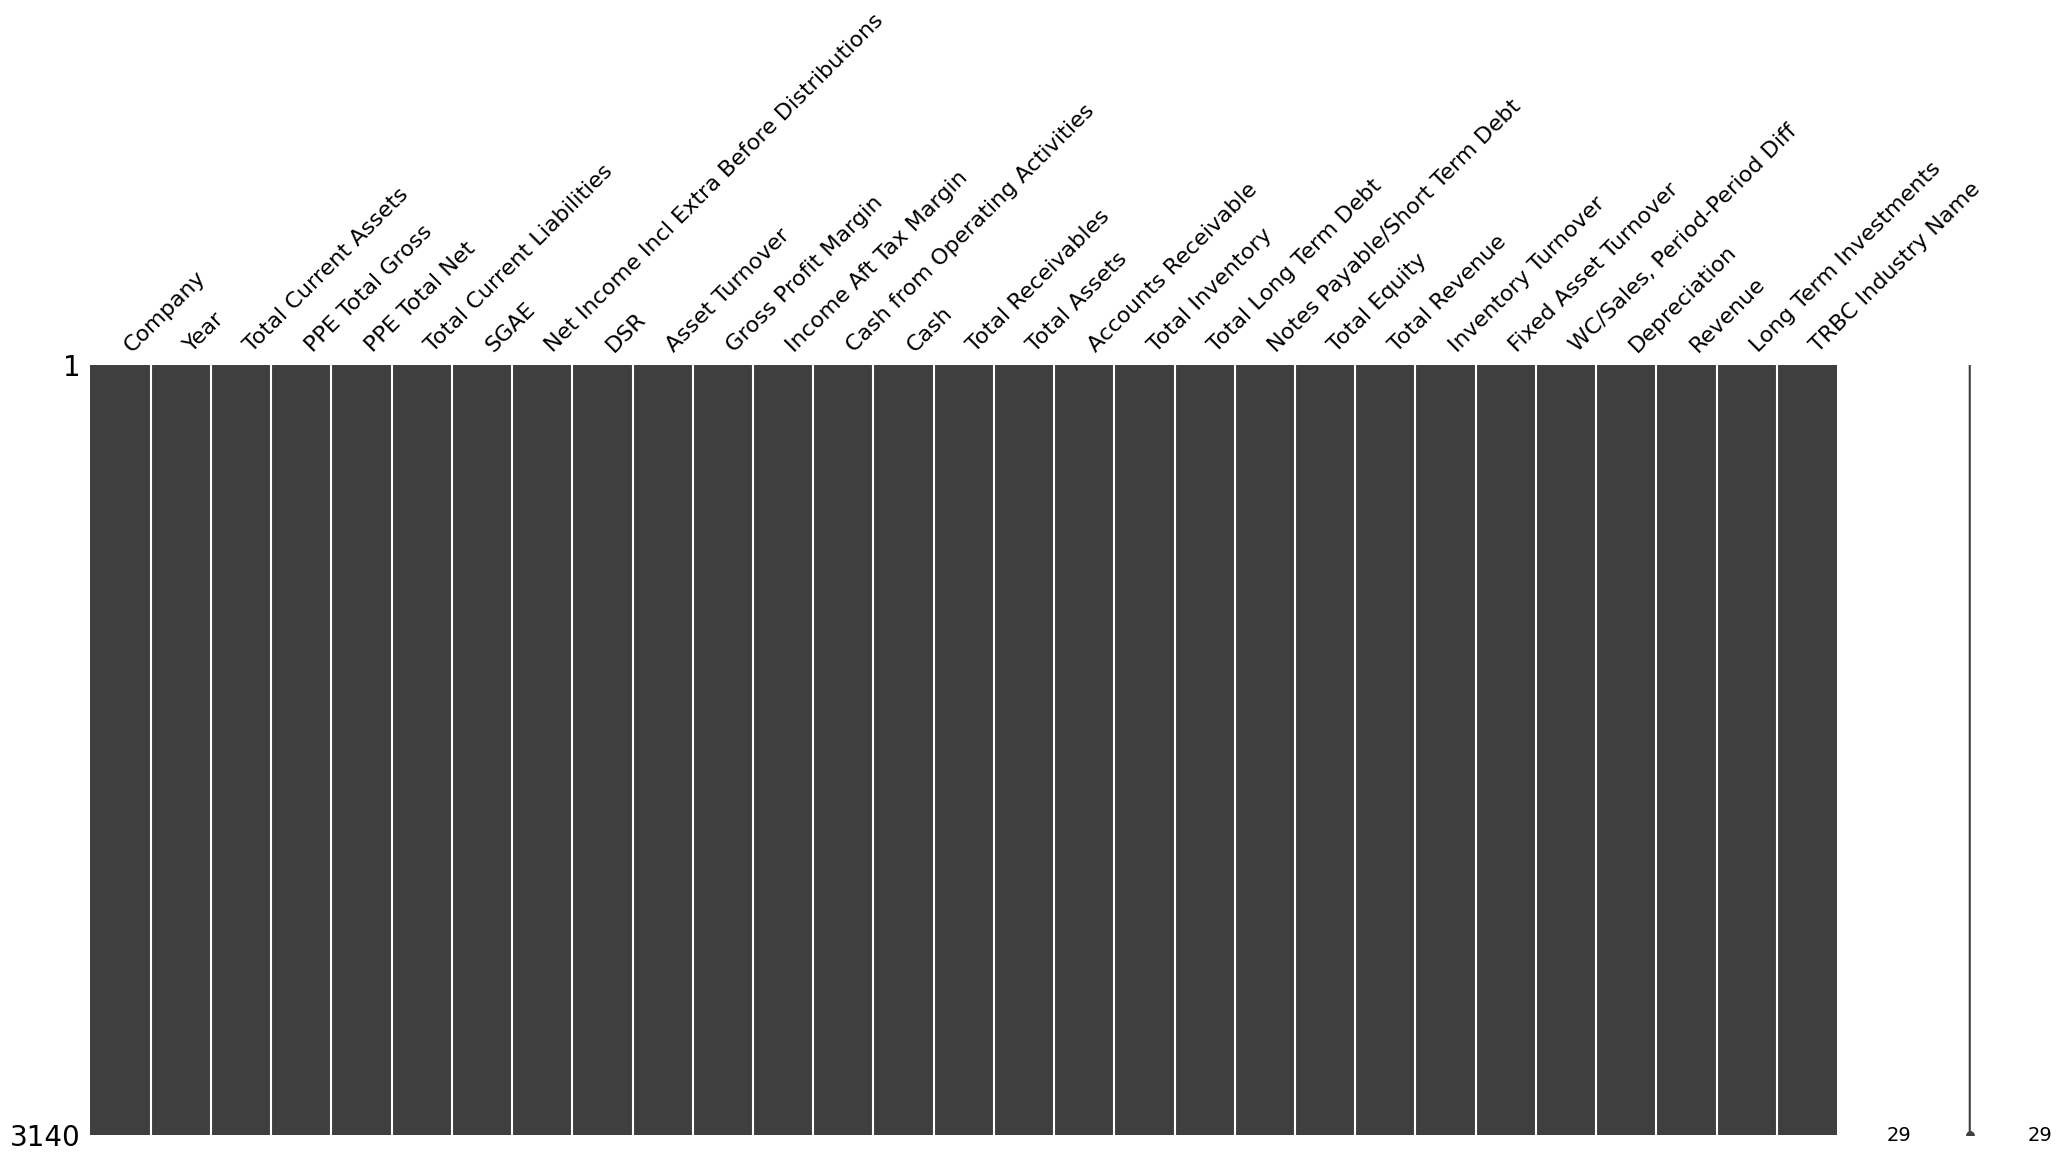

In [9]:
# create a matrix plot of missing values
msno.matrix(df)

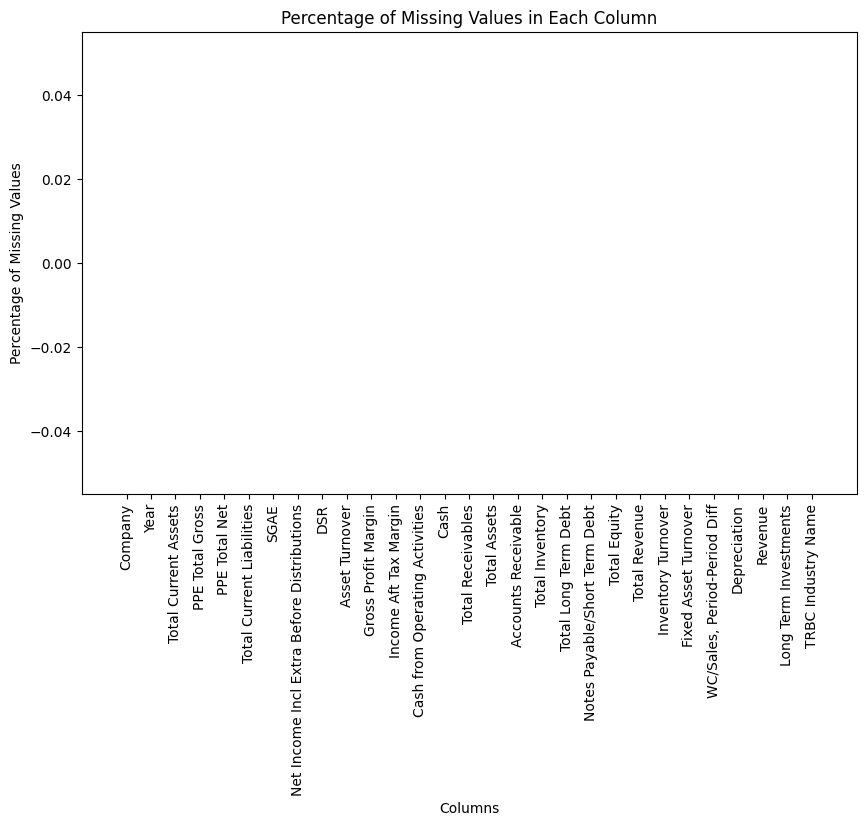

In [10]:
percent_missing = df.isna().sum() / len(df) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(percent_missing.index, percent_missing)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.show()

# Calculate M-Score

M-Score = -4.84 + 0.920 (DSR) + 0.528 (GMI) + 0.404 (AQI) + 0.892 (SGI) + 0.115 (DEPI) - 0.172 (SGAI) + 4.679 (TATA) - 0.327 (LVGI)

GMI = (1 - Gross Profit Margin) / (1 - (Previous Year's Gross Profit Margin))

AQI = (Total Current Assets + Property, Plant And Equipment, Total - Gross - Long Term Investments) / Total Assets

= (Total Current Assets + Total Gross - Long Term Investments) / Total Assets

SGI = Total Revenue (current year) / Total Revenue (previous year)

DEPI = (Depreciation / Depletion Cumulative (previous year)) / (Property, Plant And Equipment, Total - Gross + Depreciation / Depletion Cumulative (previous year))

= Depreciation / (PPE Total Gross + Previous Year's Depreciation)

SGAI = Selling/General/Administrative Expense, Total / Total Revenue 

= SGAE / Total Revenue

TATA = (Net Income Incl Extra Before Distributions - Cash from Operating Activities) / Total Assets

LVGI = ((Total Current Liabilities + Total Long Term Debt + Notes Payable/Short Term Debt) / Total Assets) / ((Previous Year's Total Current Liabilities + Previous Year's Total Long Term Debt + Previous Year's Notes Payable/Short Term Debt) / Previous Year's Total Assets)

In [11]:
used_df = df.copy()
used_df

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,Notes Payable/Short Term Debt,Total Equity,Total Revenue,Inventory Turnover,Fixed Asset Turnover,"WC/Sales, Period-Period Diff",Depreciation,Revenue,Long Term Investments,TRBC Industry Name
0,POM.HM,2013,3959029499670,4887240391770,3274346376730,3820969092980,138621600960,-193307320820,140.817493,1.213669,...,3071990381090,2389503414130,9891226461080,4.476189,2.891494,-2.001508,320035834910,9891226461080,9402985380,Iron & Steel
1,POM.HM,2014,6151052752300,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,5313725798370,2339831797850,10804878879950,3.644882,3.399511,-1.263329,322625839870,10804878879950,11402985380,Iron & Steel
2,POM.HM,2015,4234739302840,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,3616793582860,2367319295100,9807578644920,3.175598,3.344260,-0.421230,323041991260,9807578644920,11402985380,Iron & Steel
3,POM.HM,2016,4441539818360,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,3453177432550,2668412968040,9296925643430,4.545066,3.547907,2.487572,262956171150,9296925643430,11402985380,Iron & Steel
4,POM.HM,2017,5153756368800,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,3485293231910,3364646637270,11369574627890,5.727948,4.795342,3.664946,240966710580,11369574627890,51500648890,Iron & Steel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,IJC.HM,2019,5803347902020,945696166750,958787634060,5036127643530,103847512720,303682334250,1059.541451,0.203637,...,409725402340,1853895425810,1599815723180,0.214810,1.636594,-72.006690,33973113200,1599815723180,191380212540,"Real Estate Rental, Development & Operations"
3136,IJC.HM,2020,4886515196140,1000511746900,904243595020,2023962474680,87958968700,369903449900,842.573282,0.297081,...,0,3195968857430,2141295525820,0.360729,2.298722,35.015754,44979302260,2141295525820,382750009780,"Real Estate Rental, Development & Operations"
3137,IJC.HM,2021,4808121360240,1014197507820,898556414440,1939958357220,107785872340,621100240970,784.998222,0.381206,...,361918059610,3343796507710,2601723414610,0.433734,2.886314,25.376600,49802101780,2601723414610,378556941830,"Real Estate Rental, Development & Operations"
3138,IJC.HM,2022,4408199227690,1104415461970,924502553540,2011065784290,95766333520,511049064030,1048.226029,0.295246,...,325964618790,3816239356890,1968122538640,0.305188,2.159143,23.631377,55435143930,1968122538640,403090805940,"Real Estate Rental, Development & Operations"


In [12]:
# Drop rows where frequency of appearance is one
used_df = used_df[used_df.groupby('Company')['Company'].transform('count') > 1]

In [13]:
company_frequency = used_df['Company'].value_counts()

print("Amount of samples of each company column:")
print(company_frequency)

Amount of samples of each company column:
Company
IJC.HM    11
VCC.HN    11
CDC.HM    11
VC6.HN    11
TTF.HM    11
          ..
GDT.HM     2
DVG.HN     2
TKU.HN     2
TTA.HM     2
CNG.HM     2
Name: count, Length: 383, dtype: int64


In [14]:
# Sort the DataFrame by Company and Year
used_df.sort_values(by=['Company', 'Year'], inplace=True)

C:\Users\flori\AppData\Local\Temp\ipykernel_17096\2299131001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df.sort_values(by=['Company', 'Year'], inplace=True)


In [15]:
# Calculate SGI for each company
used_df['SGI'] = used_df.groupby('Company')['Total Revenue'].pct_change()

# Calculate DEPI for each company
used_df['DEPI'] = used_df['Depreciation'] / (used_df['PPE Total Gross'] + used_df.groupby('Company')['Depreciation'].shift(1))

# Calculate GMI for each company
used_df['GMI'] = (1 - used_df['Gross Profit Margin']) / (1 - used_df.groupby('Company')['Gross Profit Margin'].shift(1))

# Calculate AQI for each company
used_df['AQI'] = (used_df['Total Current Assets'] + used_df['PPE Total Gross'] - used_df['Long Term Investments']) / used_df['Total Assets']

# Calculate SGAI for each company
used_df['SGAI'] = used_df['SGAE'] / used_df['Total Revenue']

# Calculate TATA for each company
used_df['TATA'] = (used_df['Net Income Incl Extra Before Distributions'] - used_df['Cash from Operating Activities']) / used_df['Total Assets']

# Calculate LVGI for each company
used_df['LVGI'] = ((used_df['Total Current Liabilities'] + used_df['Total Long Term Debt'] + used_df['Notes Payable/Short Term Debt']) / used_df['Total Assets']) / \
             ((used_df.groupby('Company')['Total Current Liabilities'].shift(1) + used_df.groupby('Company')['Total Long Term Debt'].shift(1) + used_df.groupby('Company')['Notes Payable/Short Term Debt'].shift(1)) / used_df.groupby('Company')['Total Assets'].shift(1))

# Drop rows where any of the calculated ratios is NaN (because there's no previous year's data for the first year of each company)
used_df.dropna(subset=['SGI', 'DEPI','GMI', 'AQI', 'SGAI', 'TATA', 'LVGI'], inplace=True)

# Reset the index 
used_df.reset_index(drop=True, inplace=True)

used_df.head()

C:\Users\flori\AppData\Local\Temp\ipykernel_17096\1909094401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['SGI'] = used_df.groupby('Company')['Total Revenue'].pct_change()
C:\Users\flori\AppData\Local\Temp\ipykernel_17096\1909094401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['DEPI'] = used_df['Depreciation'] / (used_df['PPE Total Gross'] + used_df.groupby('Company')['Depreciation'].shift(1))
C:\Users\flori\AppData\Local\Temp\ipykernel_17096\1909094401.py:8: SettingWithCopyWar

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,Revenue,Long Term Investments,TRBC Industry Name,SGI,DEPI,GMI,AQI,SGAI,TATA,LVGI
0,AAA.HM,2014,694379188150,851063493210,646876068070,507673920250,105545225590,46963561090,35.255906,1.213460,...,1560643609090,39205453450,Non-Paper Containers & Packaging,0.348279,0.071348,0.742479,1.059499,0.067629,-0.036814,0.859042
1,AAA.HM,2015,1071561008460,901299077490,786534799370,667079248530,106024761170,40015870990,41.866395,0.956369,...,1614548947900,42587327200,Non-Paper Containers & Packaging,0.034540,0.086337,1.004342,0.987471,0.065668,0.057994,1.299587
2,AAA.HM,2016,1361646469010,1703369654600,1553477492950,1140284738380,105238046470,141985475970,58.795337,0.851990,...,2143769808850,44338667000,Non-Paper Containers & Packaging,0.327782,0.052027,1.238575,0.981499,0.049090,0.020086,1.187680
3,AAA.HM,2017,2142716548890,2707435817410,2301095201570,1990803708400,162451161180,223342661750,53.515413,1.063425,...,4069608303140,0,Non-Paper Containers & Packaging,0.898342,0.059325,0.940104,1.059875,0.039918,0.066433,0.934805
4,AAA.HM,2018,3989369447150,2858372141820,3321830240910,3206103405730,247320812860,180260475000,50.029224,1.323644,...,8011572613390,48380000000,Non-Paper Containers & Packaging,0.968635,0.080989,0.590817,0.903070,0.030870,0.018823,1.450368


In [16]:
# M-Score
used_df.sort_values(by=['Company', 'Year'], inplace=True)

# Calculate M-Score for each company
used_df['M-Score'] = -4.84 + \
                0.920 * used_df['DSR'] + \
                0.528 * used_df['GMI'] + \
                0.404 * used_df['AQI'] + \
                0.892 * used_df['SGI'] + \
                0.115 * used_df['DEPI'] - \
                0.172 * used_df['SGAI'] + \
                4.679 * used_df['TATA'] - \
                0.327 * used_df['LVGI']

C:\Users\flori\AppData\Local\Temp\ipykernel_17096\893855969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df.sort_values(by=['Company', 'Year'], inplace=True)
C:\Users\flori\AppData\Local\Temp\ipykernel_17096\893855969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['M-Score'] = -4.84 + \


In [17]:
used_df

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,Long Term Investments,TRBC Industry Name,SGI,DEPI,GMI,AQI,SGAI,TATA,LVGI,M-Score
0,AAA.HM,2014,694379188150,851063493210,646876068070,507673920250,105545225590,46963561090,35.255906,1.213460,...,39205453450,Non-Paper Containers & Packaging,0.348279,0.071348,0.742479,1.059499,0.067629,-0.036814,0.859042,28.269580
1,AAA.HM,2015,1071561008460,901299077490,786534799370,667079248530,106024761170,40015870990,41.866395,0.956369,...,42587327200,Non-Paper Containers & Packaging,0.034540,0.086337,1.004342,0.987471,0.065668,0.057994,1.299587,34.482148
2,AAA.HM,2016,1361646469010,1703369654600,1553477492950,1140284738380,105238046470,141985475970,58.795337,0.851990,...,44338667000,Non-Paper Containers & Packaging,0.327782,0.052027,1.238575,0.981499,0.049090,0.020086,1.187680,50.297734
3,AAA.HM,2017,2142716548890,2707435817410,2301095201570,1990803708400,162451161180,223342661750,53.515413,1.063425,...,0,Non-Paper Containers & Packaging,0.898342,0.059325,0.940104,1.059875,0.039918,0.066433,0.934805,46.125180
4,AAA.HM,2018,3989369447150,2858372141820,3321830240910,3206103405730,247320812860,180260475000,50.029224,1.323644,...,48380000000,Non-Paper Containers & Packaging,0.968635,0.080989,0.590817,0.903070,0.030870,0.018823,1.450368,42.345505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,YEG.HM,2018,1699774844110,17864267900,5320641360,404013709080,358230112990,140912532160,67.139213,1.280291,...,63828000000,Entertainment Production,0.995097,0.896288,1.184067,0.843026,0.213667,0.218321,0.451876,59.721555
2743,YEG.HM,2019,1156187669450,30748772080,16015573350,494279582970,479812574200,-385325740390,97.241849,0.835311,...,69560691140,Entertainment Production,-0.133777,0.436737,0.123319,0.737300,0.330383,0.005186,1.778506,84.302247
2744,YEG.HM,2020,974176214860,31128275800,14789860760,431357255260,257884454630,-181588026600,118.548243,0.840292,...,135174238880,Entertainment Production,-0.160900,0.333170,0.483887,0.628267,0.211620,0.177900,0.942914,105.116149
2745,YEG.HM,2021,1134580036180,24731860710,8007571970,403533140180,237008909770,19793101930,210.650498,0.783032,...,133341086380,Entertainment Production,-0.114155,1.438609,1.098529,0.747638,0.219553,0.078842,0.976260,189.916043


In [18]:
# Create a new column to categorize M-Score as "Fraud" or "Not Fraud"
used_df['Status'] = used_df['M-Score'].apply(lambda x: "Fraud" if x <= -2.22 else "Not Fraud")

C:\Users\flori\AppData\Local\Temp\ipykernel_17096\843476638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['Status'] = used_df['M-Score'].apply(lambda x: "Fraud" if x <= -2.22 else "Not Fraud")


In [19]:
used_df

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,TRBC Industry Name,SGI,DEPI,GMI,AQI,SGAI,TATA,LVGI,M-Score,Status
0,AAA.HM,2014,694379188150,851063493210,646876068070,507673920250,105545225590,46963561090,35.255906,1.213460,...,Non-Paper Containers & Packaging,0.348279,0.071348,0.742479,1.059499,0.067629,-0.036814,0.859042,28.269580,Not Fraud
1,AAA.HM,2015,1071561008460,901299077490,786534799370,667079248530,106024761170,40015870990,41.866395,0.956369,...,Non-Paper Containers & Packaging,0.034540,0.086337,1.004342,0.987471,0.065668,0.057994,1.299587,34.482148,Not Fraud
2,AAA.HM,2016,1361646469010,1703369654600,1553477492950,1140284738380,105238046470,141985475970,58.795337,0.851990,...,Non-Paper Containers & Packaging,0.327782,0.052027,1.238575,0.981499,0.049090,0.020086,1.187680,50.297734,Not Fraud
3,AAA.HM,2017,2142716548890,2707435817410,2301095201570,1990803708400,162451161180,223342661750,53.515413,1.063425,...,Non-Paper Containers & Packaging,0.898342,0.059325,0.940104,1.059875,0.039918,0.066433,0.934805,46.125180,Not Fraud
4,AAA.HM,2018,3989369447150,2858372141820,3321830240910,3206103405730,247320812860,180260475000,50.029224,1.323644,...,Non-Paper Containers & Packaging,0.968635,0.080989,0.590817,0.903070,0.030870,0.018823,1.450368,42.345505,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,YEG.HM,2018,1699774844110,17864267900,5320641360,404013709080,358230112990,140912532160,67.139213,1.280291,...,Entertainment Production,0.995097,0.896288,1.184067,0.843026,0.213667,0.218321,0.451876,59.721555,Not Fraud
2743,YEG.HM,2019,1156187669450,30748772080,16015573350,494279582970,479812574200,-385325740390,97.241849,0.835311,...,Entertainment Production,-0.133777,0.436737,0.123319,0.737300,0.330383,0.005186,1.778506,84.302247,Not Fraud
2744,YEG.HM,2020,974176214860,31128275800,14789860760,431357255260,257884454630,-181588026600,118.548243,0.840292,...,Entertainment Production,-0.160900,0.333170,0.483887,0.628267,0.211620,0.177900,0.942914,105.116149,Not Fraud
2745,YEG.HM,2021,1134580036180,24731860710,8007571970,403533140180,237008909770,19793101930,210.650498,0.783032,...,Entertainment Production,-0.114155,1.438609,1.098529,0.747638,0.219553,0.078842,0.976260,189.916043,Not Fraud


In [20]:
new_df = used_df

**Categories distribution**

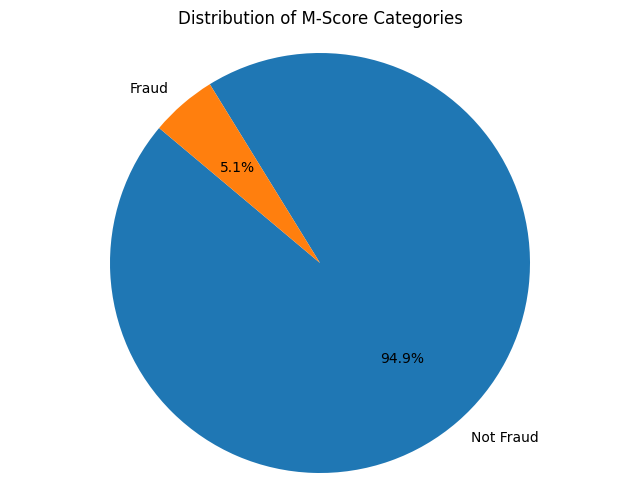

In [21]:
# Count the occurrences of each category
category_counts = used_df['Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of M-Score Categories')
plt.axis('equal')
plt.show()

In [22]:
used_df.columns

Index(['Company', 'Year', 'Total Current Assets', 'PPE Total Gross',
       'PPE Total Net', 'Total Current Liabilities', 'SGAE',
       'Net Income Incl Extra Before Distributions', 'DSR', 'Asset Turnover',
       'Gross Profit Margin', 'Income Aft Tax Margin',
       'Cash from Operating Activities', 'Cash', 'Total Receivables',
       'Total Assets', 'Accounts Receivable', 'Total Inventory',
       'Total Long Term Debt', 'Notes Payable/Short Term Debt', 'Total Equity',
       'Total Revenue', 'Inventory Turnover', 'Fixed Asset Turnover',
       'WC/Sales, Period-Period Diff', 'Depreciation', 'Revenue',
       'Long Term Investments', 'TRBC Industry Name', 'SGI', 'DEPI', 'GMI',
       'AQI', 'SGAI', 'TATA', 'LVGI', 'M-Score', 'Status'],
      dtype='object')

**Correlation matrix**

In [23]:
# Select relevant columns for correlation analysis
# selected_columns = ['DSR', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'TATA', 'LVGI', 'M-Score']
selected_columns = ['Total Current Assets', 'PPE Total Gross', 'PPE Total Net', 'Total Current Liabilities', 
            'SGAE', 'Net Income Incl Extra Before Distributions', 'DSR', 'Gross Profit Margin', 'Cash from Operating Activities', 
            'Cash', 'Total Assets',  'Total Long Term Debt', 'Notes Payable/Short Term Debt', 'Total Revenue', 
            'Depreciation', 'Revenue', 'Long Term Investments', 'SGI', 'DEPI', 'GMI', 'AQI', 'SGAI', 'TATA', 'LVGI', 
            'M-Score']

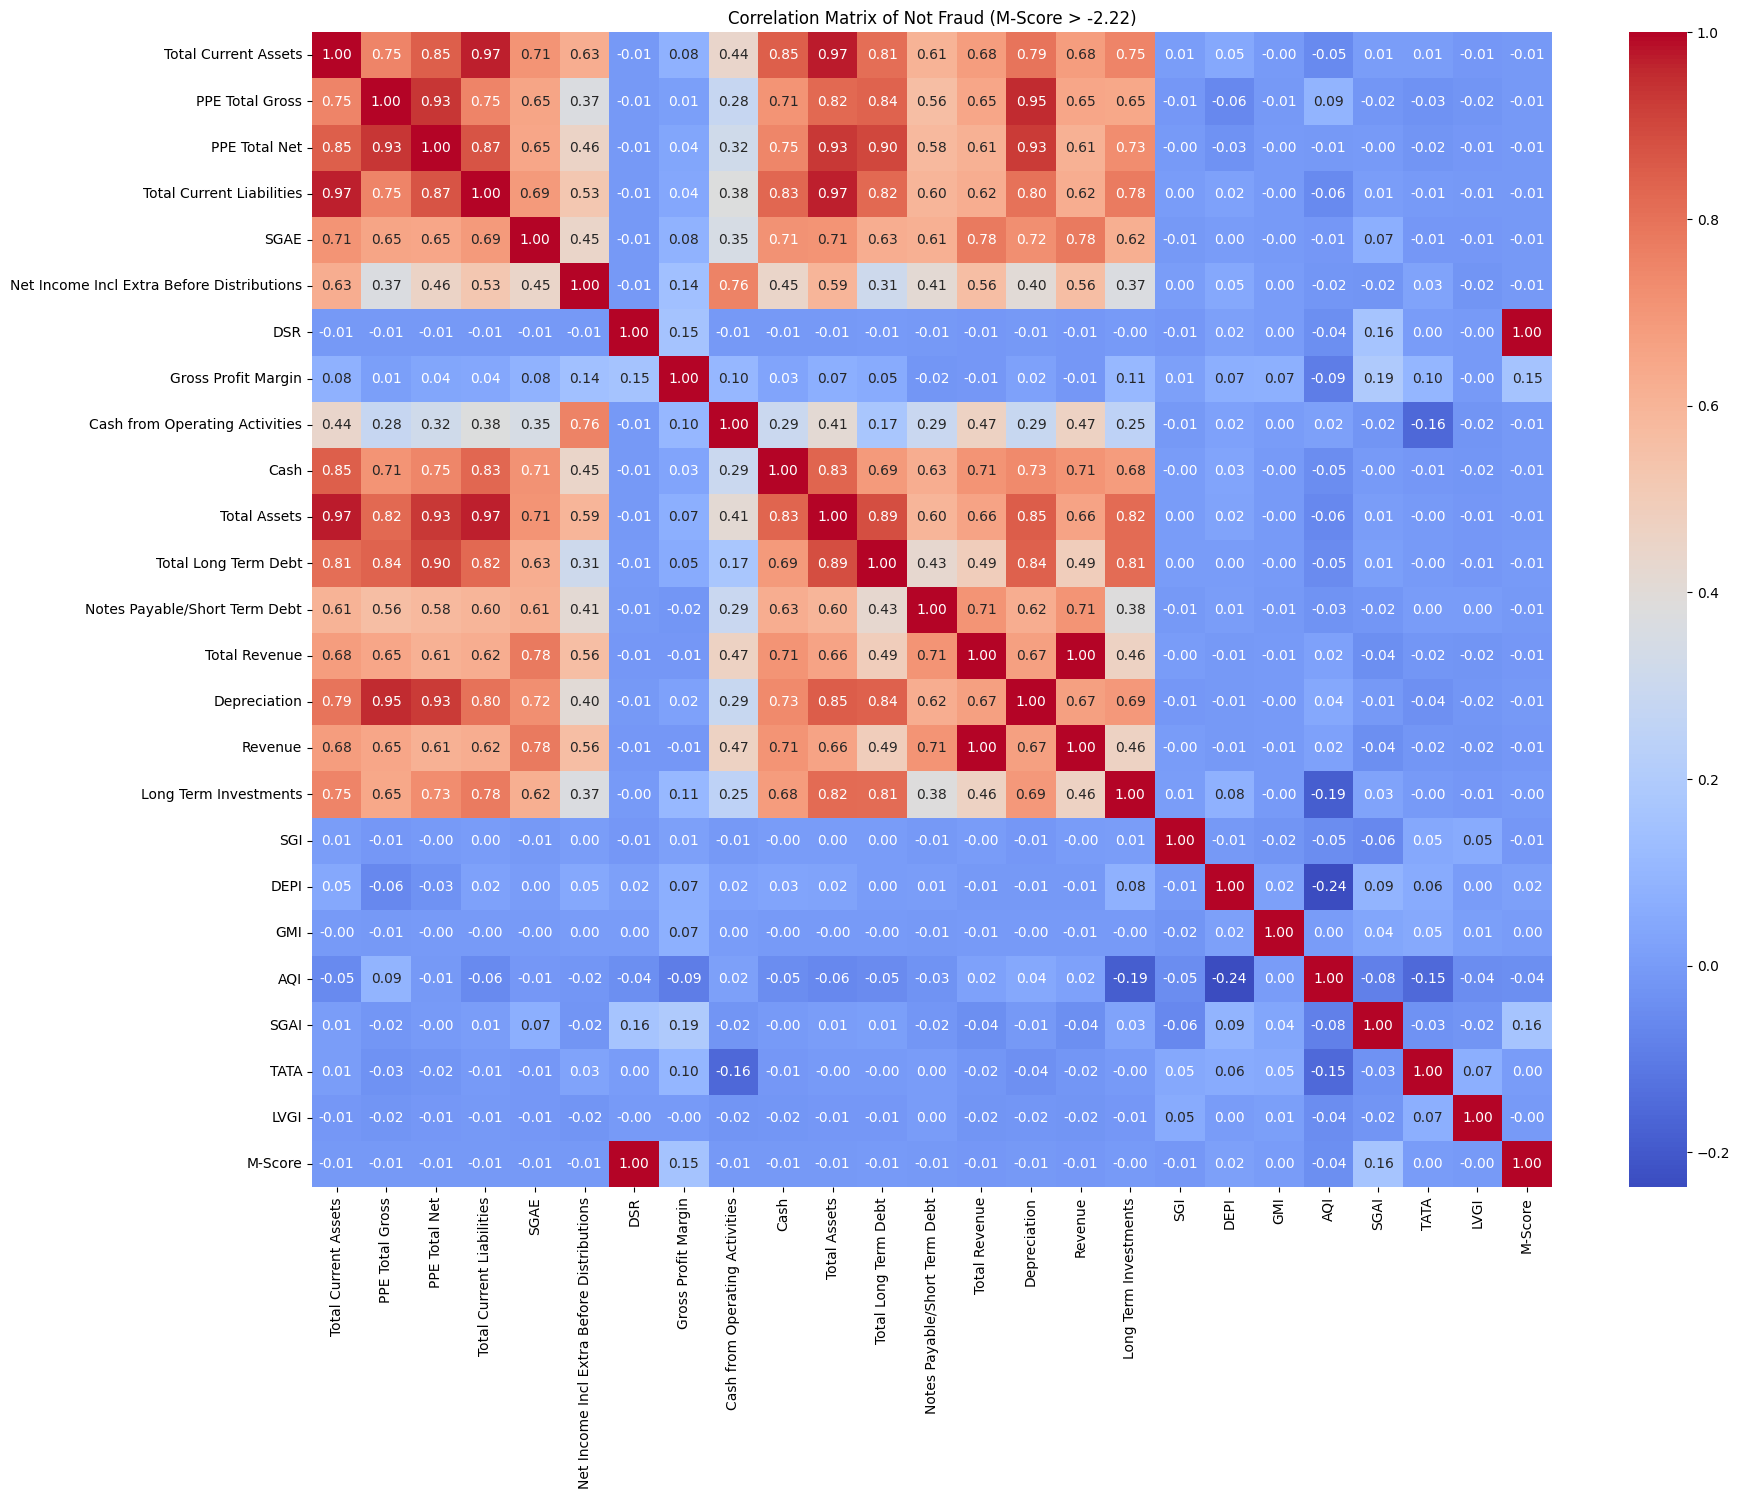

In [24]:
filtered_df_n = used_df[used_df['M-Score'] > -2.22]
filtered_df_n = filtered_df_n[selected_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_df_n.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Not Fraud (M-Score > -2.22)')
plt.show()

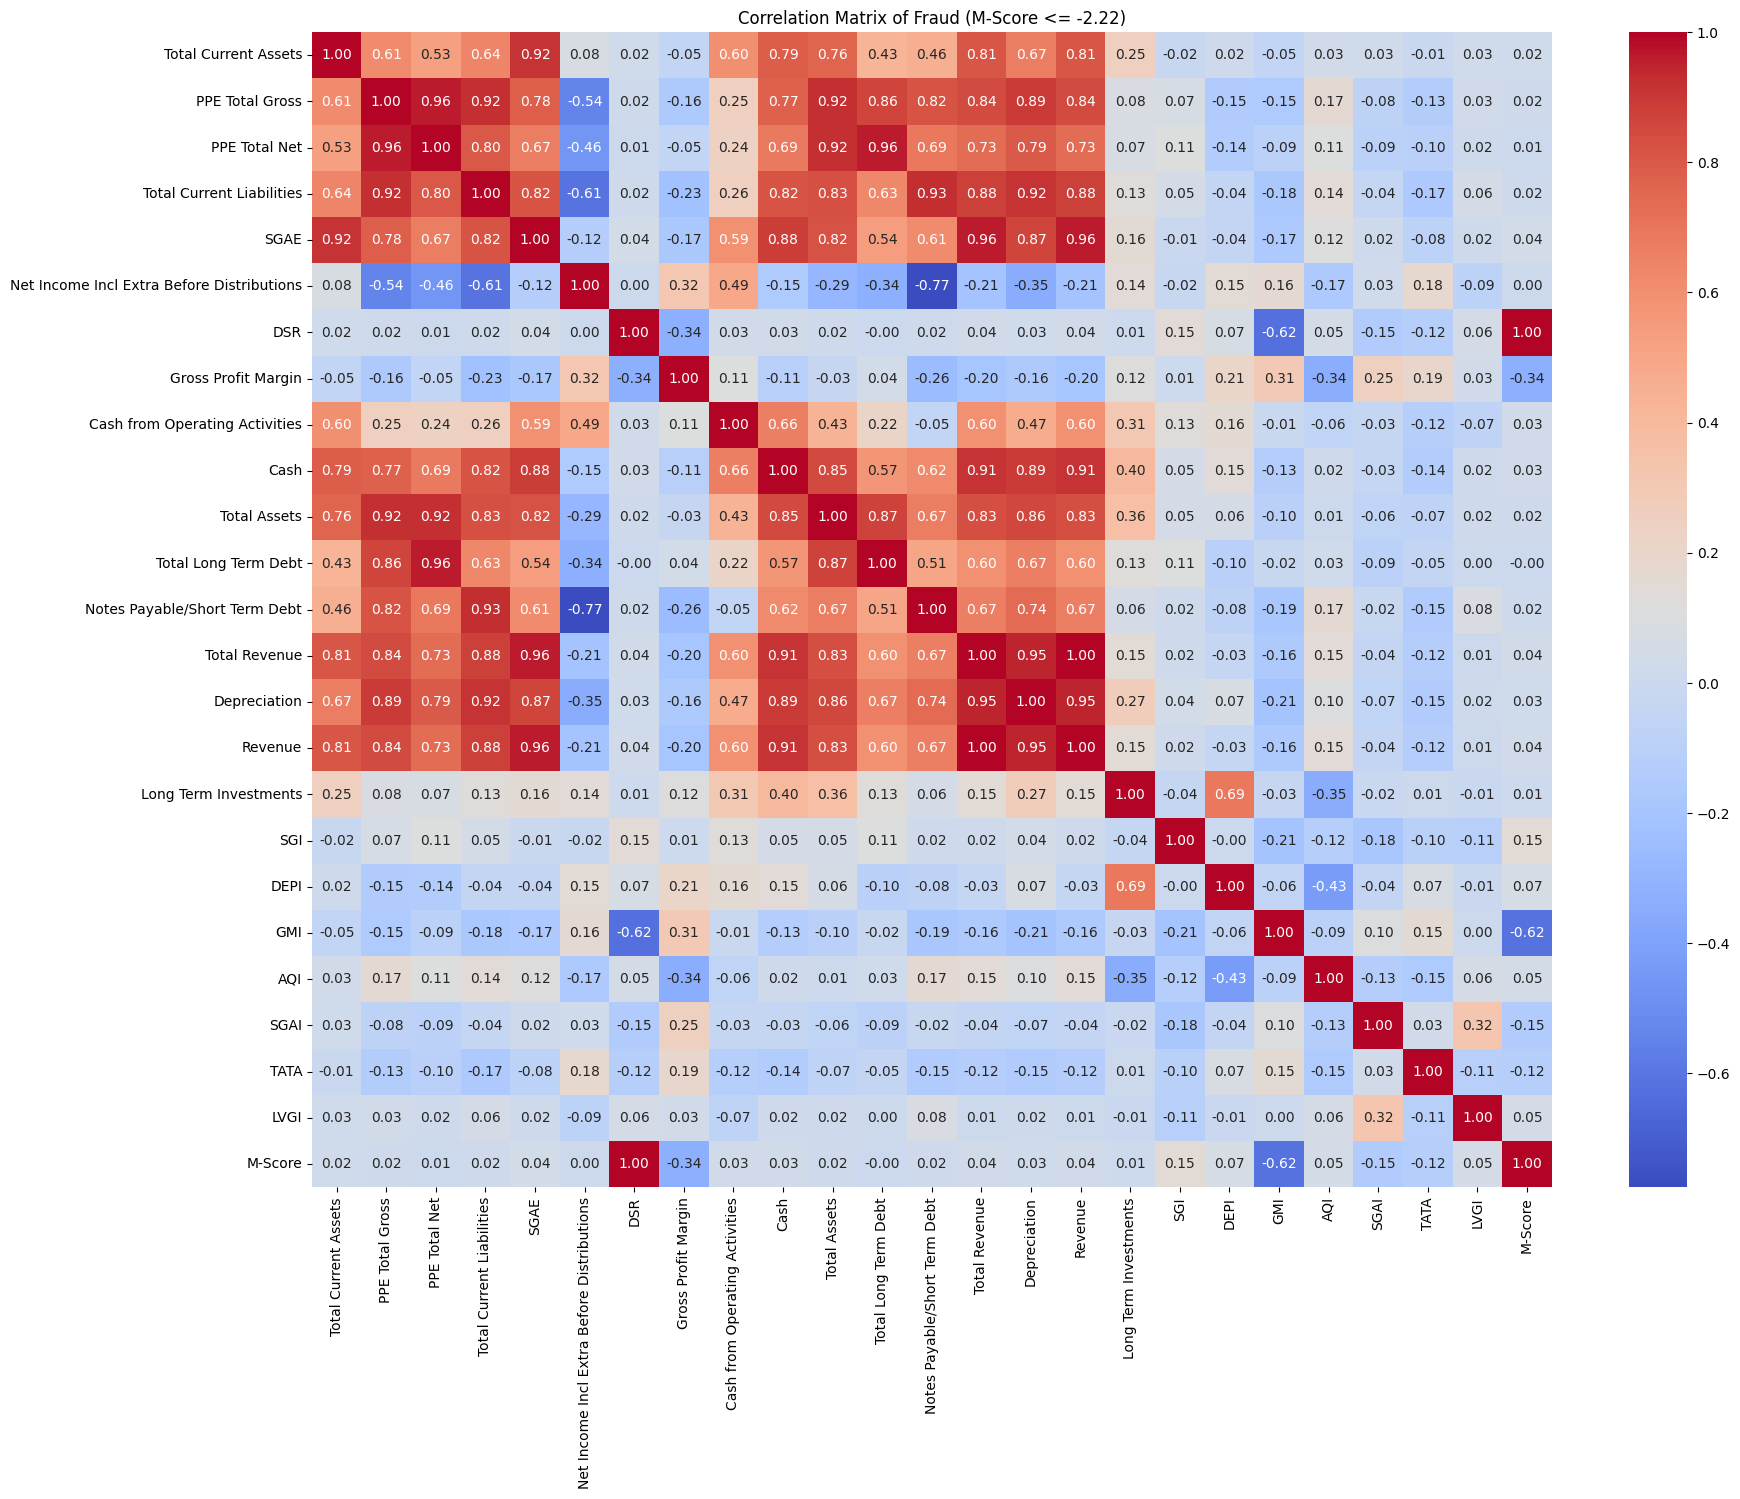

In [25]:
filtered_df = used_df[used_df['M-Score'] <= -2.22]
filtered_df = filtered_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Fraud (M-Score <= -2.22)')
plt.show()

M-Score is a formular calculated by time series parameters

=> M-Score is continuous.

**Majors of each category**

In [26]:
# Get unique values of "Ngành" for M-score >= -2.22
nganh_high_mscore = used_df[used_df['M-Score'] > -2.22]

# Count the occurrences of each unique value in the "TRBC Industry Name" column
nganh_counts = nganh_high_mscore['TRBC Industry Name'].value_counts()

# Print the "Ngành" name with the amount of its corresponding companies whose M-Score >= -2.22
print("Major has M-score >= -2.22 (Not Fraud):")
for nganh, count in nganh_counts.items():
    print(f"{nganh}: {count}")

Major has M-score >= -2.22 (Not Fraud):
Real Estate Rental, Development & Operations: 363
Construction & Engineering: 327
Food Processing: 172
Iron & Steel: 115
Construction Materials: 97
Pharmaceuticals: 92
Oil & Gas Refining and Marketing: 86
Independent Power Producers: 82
Construction Supplies & Fixtures: 70
Marine Port Services: 62
Apparel & Accessories: 60
Fishing & Farming: 54
Non-Paper Containers & Packaging: 53
Agricultural Chemicals: 52
Commodity Chemicals: 48
Electrical Components & Equipment: 46
Home Furnishings: 43
Oil & Gas Transportation Services: 40
Textiles & Leather Goods: 33
Tires & Rubber Products: 33
Brewers: 27
Marine Freight & Logistics: 26
Paper Products: 25
Coal: 24
Renewable Energy Equipment & Services: 23
Computer & Electronics Retailers: 22
Auto Vehicles, Parts & Service Retailers: 21
Forest & Wood Products: 21
Airport Operators & Services: 20
Passenger Transportation, Ground & Sea: 19
Communications & Networking: 19
Diversified Industrial Goods Wholesale: 1

In [27]:
# Get unique values of "Ngành" for M-Score >= -2.22 along with count
nganh_low_mscore = used_df[used_df['M-Score'] <= -2.22]

# Count the occurrences of each unique value in the "TRBC Industry Name" column
nganh_counts = nganh_low_mscore['TRBC Industry Name'].value_counts()

# Print the "Ngành" name with the amount of its corresponding companies whose M-Score >= -2.22
print("Major has M-score <= -2.22 (Fraud):")
for nganh, count in nganh_counts.items():
    print(f"{nganh}: {count}")

Major has M-score <= -2.22 (Fraud):
Oil & Gas Refining and Marketing: 33
Real Estate Rental, Development & Operations: 17
Water & Related Utilities: 14
Marine Port Services: 13
Food Retail & Distribution: 8
Highways & Rail Tracks: 7
Electric Utilities: 6
Airlines: 6
Construction Materials: 6
Independent Power Producers: 6
Brewers: 4
Household Products: 3
Diversified Industrial Goods Wholesale: 2
Department Stores: 2
Non-Alcoholic Beverages: 2
Coal: 2
Real Estate Services: 2
Auto & Truck Manufacturers: 1
Ground Freight & Logistics: 1
Fishing & Farming: 1
Marine Freight & Logistics: 1
Natural Gas Utilities: 1
Passenger Transportation, Ground & Sea: 1
Healthcare Facilities & Services: 1


# Variables Importance

In [28]:
used_df.sort_values(by='Year', inplace=True)

# Selecting relevant features
features = ['Total Current Assets', 'PPE Total Gross', 'PPE Total Net', 'Total Current Liabilities', 
            'SGAE', 'Net Income Incl Extra Before Distributions', 'DSR', 'Asset Turnover', 
            'Gross Profit Margin', 'Income Aft Tax Margin', 'Cash from Operating Activities', 
            'Cash', 'Total Receivables', 'Total Assets', 'Accounts Receivable', 'Total Inventory', 
            'Total Long Term Debt', 'Notes Payable/Short Term Debt', 'Total Equity', 'Total Revenue', 
            'Inventory Turnover', 'Fixed Asset Turnover', 'WC/Sales, Period-Period Diff', 'Depreciation', 
            'Revenue', 'Long Term Investments', 'SGI', 'DEPI', 'GMI', 'AQI', 'SGAI', 'TATA', 'LVGI', 
            'M-Score']


C:\Users\flori\AppData\Local\Temp\ipykernel_17096\36368391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df.sort_values(by='Year', inplace=True)


In [29]:
# Splitting features and target variable
X = used_df[features]
y = used_df['Status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

In [30]:
# Initialize a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y_encoded)

RandomForestClassifier(random_state=42)

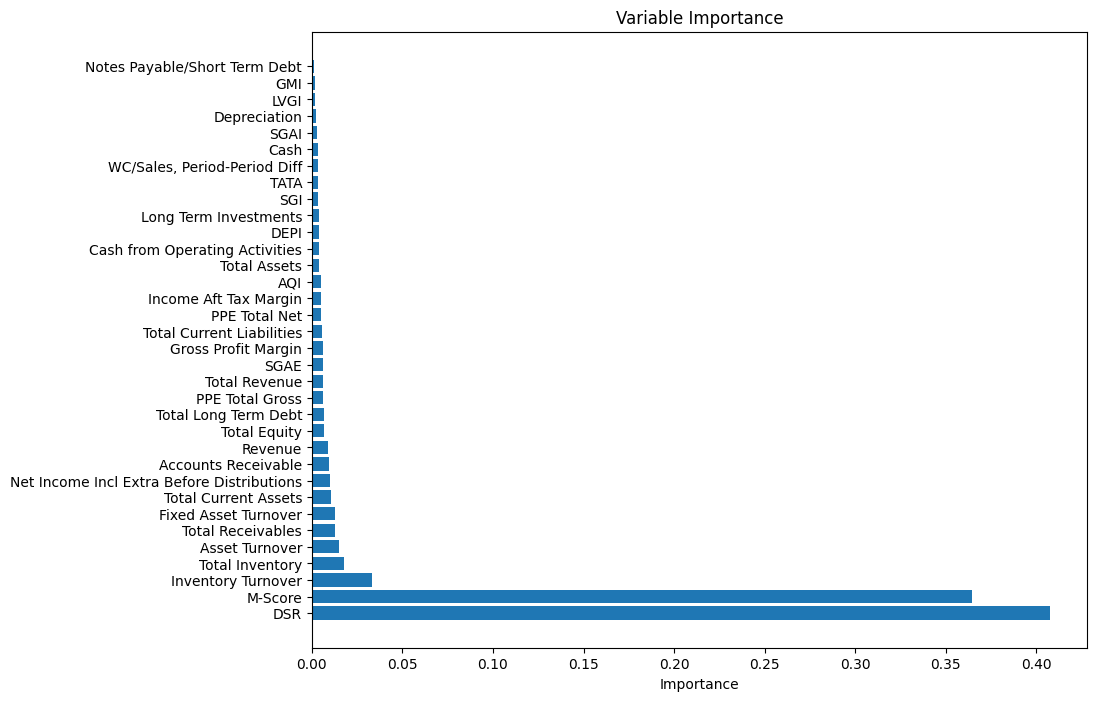

In [31]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the variable importance chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Variable Importance')
plt.show()

# Downsampling

=>  Based on the the imbalance of dataset (the distribution of Not Manipulator is much higher than the distribution of Manipulator)

=> Apply downsampling technique

In [32]:
new_df

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,TRBC Industry Name,SGI,DEPI,GMI,AQI,SGAI,TATA,LVGI,M-Score,Status
623,FCN.HM,2013,1167991808930,353804699060,242028563290,848944461970,61431394050,102332184560,107.292337,0.851846,...,Construction & Engineering,0.195171,0.093304,0.637126,0.861203,0.050992,-0.018038,0.865167,94.362023,Not Fraud
0,AAA.HM,2014,694379188150,851063493210,646876068070,507673920250,105545225590,46963561090,35.255906,1.213460,...,Non-Paper Containers & Packaging,0.348279,0.071348,0.742479,1.059499,0.067629,-0.036814,0.859042,28.269580,Not Fraud
650,FPT.HM,2014,16709157051320,5890733574570,3535984457900,12969956085570,3853852548680,1632085087190,76.318363,1.622945,...,Consumer Goods Conglomerates,0.207814,0.086406,0.921157,0.961693,0.118055,0.021230,1.676053,65.974057,Not Fraud
648,FMC.HM,2014,999101600800,383574876450,159977859690,793199876010,141640970240,62790237980,68.674420,2.982661,...,Food Processing,0.318793,0.056853,1.351185,1.153269,0.049168,0.229887,0.977703,60.558188,Not Fraud
1755,PVS.HN,2014,16930157471290,10674309633120,5030785713830,11506376906450,790996849100,1974763911960,42.022035,1.255602,...,Oil Related Services and Equipment,0.247281,0.084357,0.756188,0.885288,0.024949,-0.066957,0.902253,34.194853,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,COM.HM,2023,199890601070,244641114890,134009790030,51011163800,150469014140,34457590900,7.082046,8.545927,...,Oil & Gas Refining and Marketing,-0.098282,0.042435,1.898416,0.905352,0.034652,-0.034428,0.709248,2.561846,Not Fraud
1538,PGN.HN,2023,176498129910,52021753760,29665811200,101633133750,3793666310,5223106730,214.923834,1.065018,...,Commodity Chemicals,-0.203837,0.078001,0.768908,1.084597,0.017671,0.021392,1.149721,193.282333,Not Fraud
346,CNG.HM,2023,960885782140,1119719367150,144115195030,529209756270,149603375320,102786848020,-0.143591,2.559694,...,Natural Gas Utilities,-0.256464,0.062789,1.196960,1.785841,0.048073,0.047322,0.886406,-3.916879,Fraud
2555,VGS.HN,2023,1480367394870,482797694630,817133886140,1258692254080,81524110130,58066704390,36.280622,3.276396,...,Iron & Steel,-0.109338,0.029259,1.190847,0.755744,0.010790,0.001105,1.006105,29.052411,Not Fraud


it's not recommend to upsample the testing data (X_test, y_test). The testing data should represent the real distribution of classes in your dataset. Upsampling the testing data would introduce artificial data points and potentially bias your evaluation results.

In [33]:
# Separate majority and minority classes
df_majority = new_df[new_df['Status'] == 'Not Fraud']
df_minority = new_df[new_df['Status'] == 'Fraud']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Sample without replacement
                                   n_samples=int(len(df_minority) * 0.7 / 0.3),     # Match minority class size
                                   random_state=42) # Reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution
print(df_downsampled['Status'].value_counts())

Status
Not Fraud    326
Fraud        140
Name: count, dtype: int64


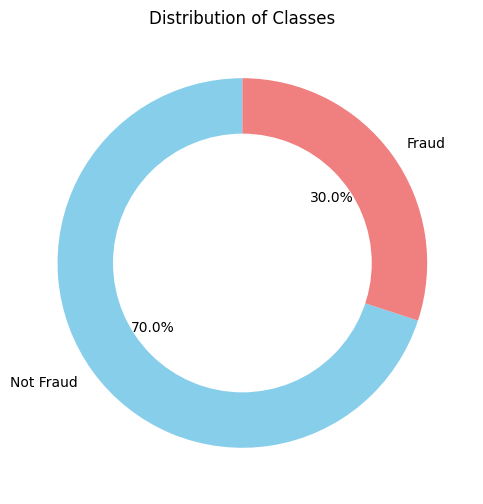

In [34]:
# Count the occurrences of each class
class_counts = df_downsampled['Status'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create a donut chart
plt.title('Distribution of Classes')
plt.show()

In [35]:
features = ['DSR', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'TATA', 'LVGI']
target = 'Status'

X = df_downsampled[features]
y = df_downsampled[target]

In [36]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to num

In [38]:
def convert_to_numeric(array):
    unique_values = np.unique(array)
    mapping = {value: index for index, value in enumerate(unique_values)}
    return np.array([mapping[value] for value in array])

# Random Forest

In [39]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=2, random_state = 42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [40]:
# Predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

Accuracy:  0.9042553191489362
Recall: 0.9328358208955223
Precision: 0.875
F1-score: 0.8925714285714286
Confusion matrix:
    0   1
0  27   0
1   9  58 

Classification report:
              precision    recall  f1-score   support

       Fraud       0.75      1.00      0.86        27
   Not Fraud       1.00      0.87      0.93        67

    accuracy                           0.90        94
   macro avg       0.88      0.93      0.89        94
weighted avg       0.93      0.90      0.91        94



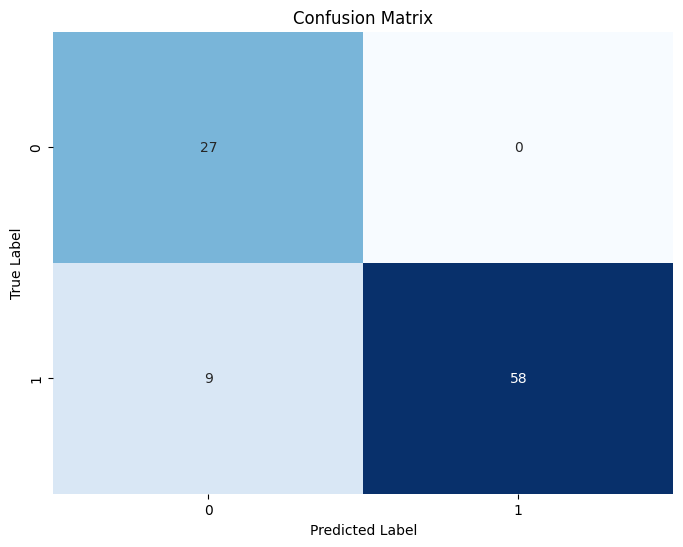

In [41]:
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro')  #average type calculates metrics globally by considering all classes ('macro')
recall_rf = recall_score(y_test, y_pred, average='macro') 
f1_rf = f1_score(y_test, y_pred, average='macro') 


print("Accuracy: ", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1-score:", f1_rf)


print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

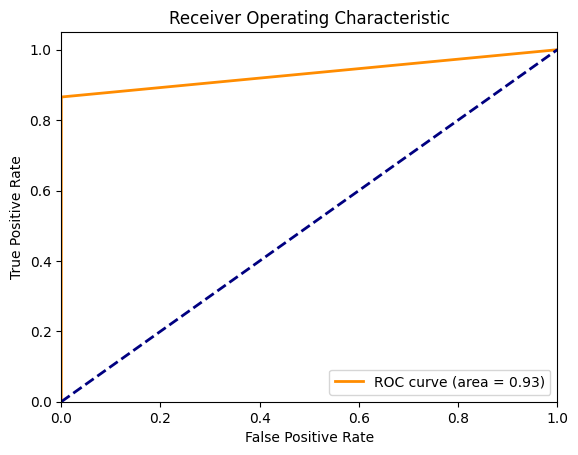

In [42]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [43]:
# Define the hyperparameters grid
param_grid = {
    'C': [10, 100, 1000, 10000, 100000],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty (L1 or L2 regularization)
}

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')


In [44]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\flori\AppDat

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [45]:
# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV
best_logistic_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_logistic_model.predict(X_test_scaled)

Best Parameters: {'C': 100000, 'penalty': 'l2'}


Accuracy:  0.9574468085106383
Recall: 0.9590934217799889
Precision: 0.9405835543766579
F1-score: 0.9491341991341992
Confusion matrix:
    0   1
0  26   1
1   3  64 

Classification report:
              precision    recall  f1-score   support

       Fraud       0.90      0.96      0.93        27
   Not Fraud       0.98      0.96      0.97        67

    accuracy                           0.96        94
   macro avg       0.94      0.96      0.95        94
weighted avg       0.96      0.96      0.96        94



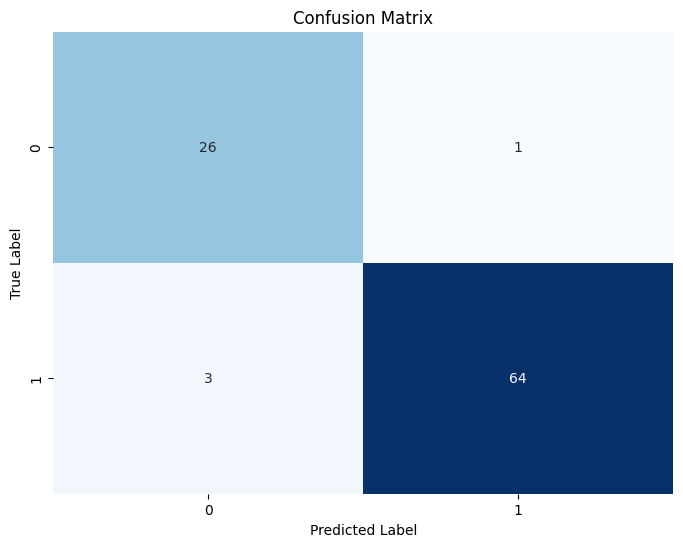

In [46]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='macro')  #average type calculates metrics globally by considering all classes ('macro')
recall_lr = recall_score(y_test, y_pred, average='macro') 
f1_lr = f1_score(y_test, y_pred, average='macro') 


print("Accuracy: ", accuracy_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("F1-score:", f1_lr)


print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

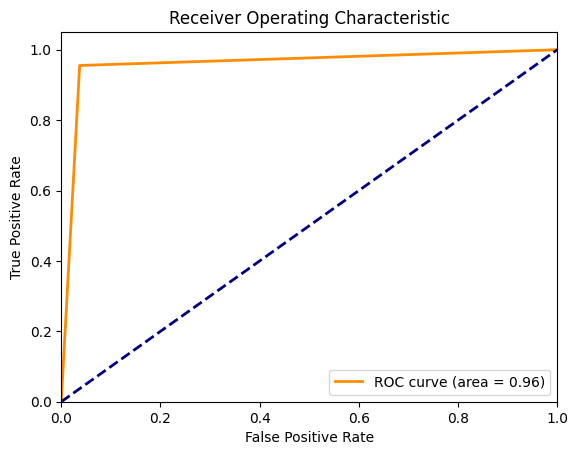

In [47]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# XGBoost

In [48]:
model = xgb.XGBClassifier(objective='binary:logistic', seed=42,
                          learning_rate=0.01, max_depth=3, n_estimators=5)

In [49]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [50]:
# Train the model
model.fit(X_train_scaled, y_train_encoded
          , eval_metric="error", eval_set=[(X_test_scaled, y_test_encoded)],
          early_stopping_rounds=10, verbose=True)

[0]	validation_0-error:0.28723
[1]	validation_0-error:0.28723
[2]	validation_0-error:0.28723
[3]	validation_0-error:0.28723
[4]	validation_0-error:0.28723


c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
# Evaluate the model
y_pred_encoded = model.predict(X_test_scaled)

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.7127659574468085
Precision: 0.7127659574468085
Recall: 1.0
F1-score: 0.8322981366459627

Confusion Matrix:
[[ 0 27]
 [ 0 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.71      1.00      0.83        67

    accuracy                           0.71        94
   macro avg       0.36      0.50      0.42        94
weighted avg       0.51      0.71      0.59        94



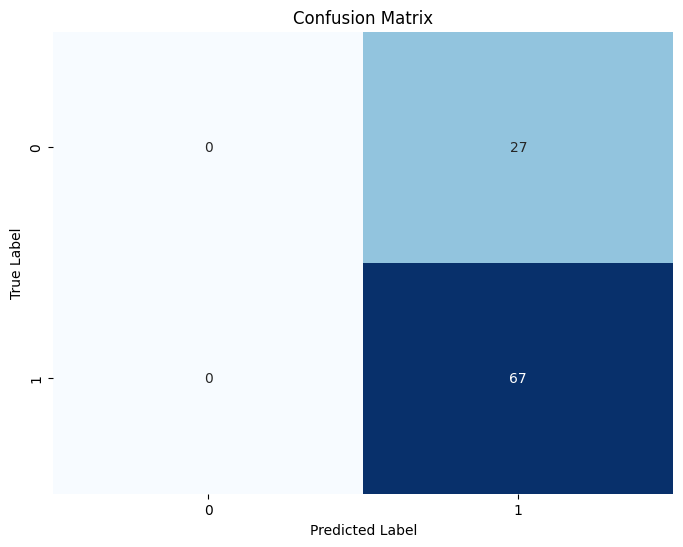

In [52]:
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_encoded)
precision_xgb = precision_score(y_test_encoded, y_pred_encoded)
recall_xgb = recall_score(y_test_encoded, y_pred_encoded)
f1_xgb = f1_score(y_test_encoded, y_pred_encoded)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report_xgb = classification_report(y_test_encoded, y_pred_encoded)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

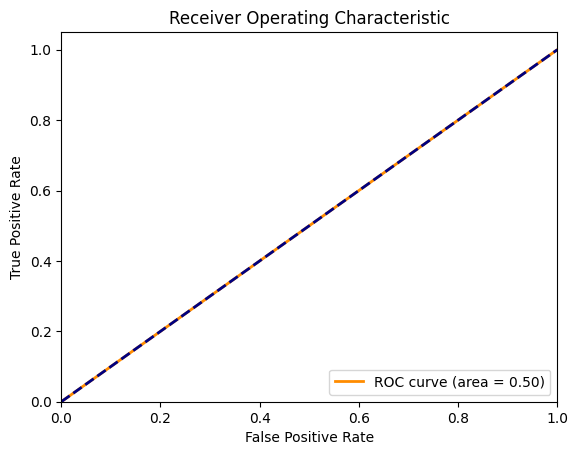

In [53]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred_encoded)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Naive Baiye

In [54]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [55]:
# Predict the labels for the test data
y_pred = nb_model.predict(X_test_scaled)

Accuracy: 0.4148936170212766
Precision: 0.6267857142857143
Recall: 0.5784964068546158
F1-score: 0.40348448136610127

Confusion Matrix:
[[26  1]
 [54 13]]

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.33      0.96      0.49        27
   Not Fraud       0.93      0.19      0.32        67

    accuracy                           0.41        94
   macro avg       0.63      0.58      0.40        94
weighted avg       0.76      0.41      0.37        94



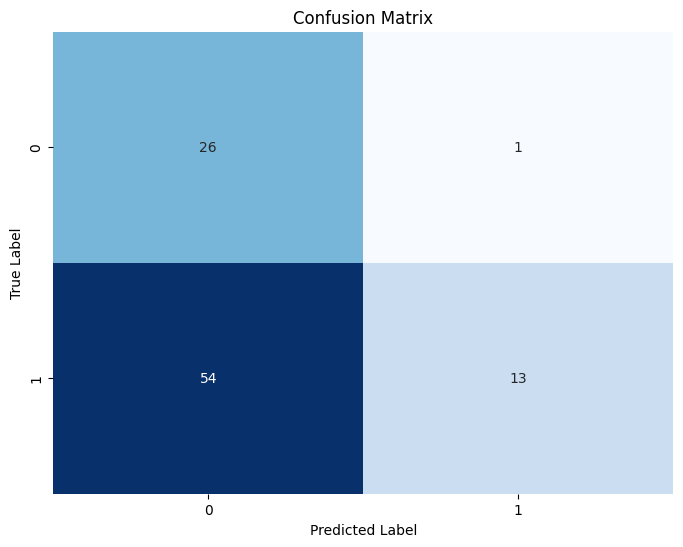

In [56]:
# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='macro')
recall_nb = recall_score(y_test, y_pred, average='macro')
f1_nb = f1_score(y_test, y_pred, average='macro')

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix_nb)

# Classification Report
class_report_nb = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

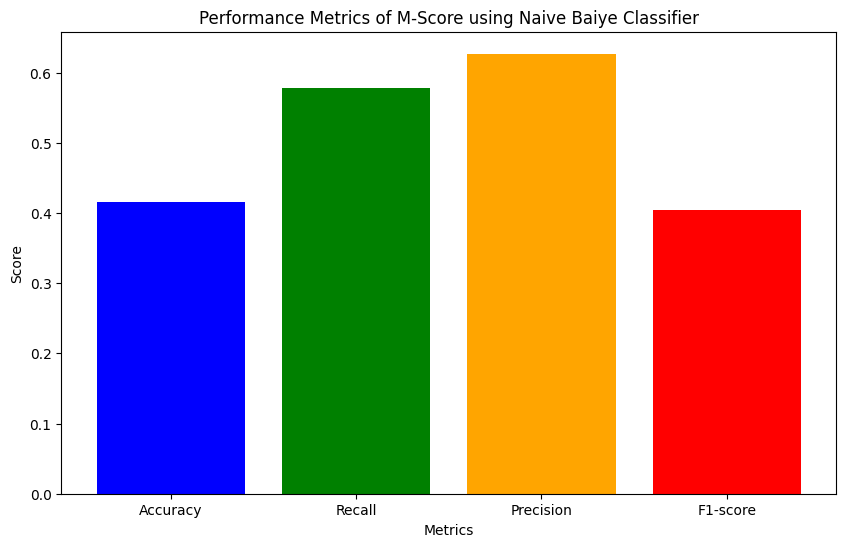

In [57]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-score']
values = [accuracy_nb, recall_nb, precision_nb, f1_nb]

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of M-Score using Naive Baiye Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

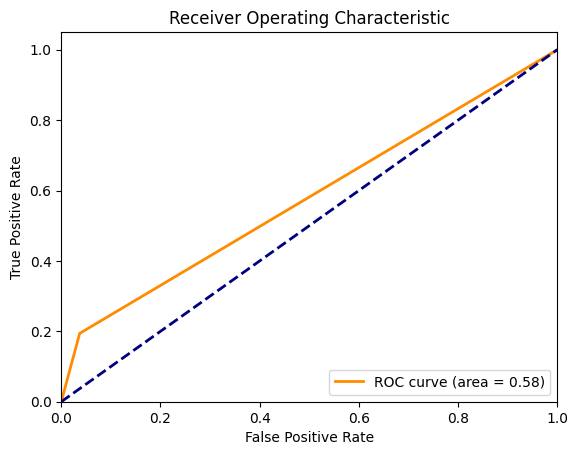

In [58]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine (SVM)

In [59]:
# Define a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

# Define the grid of hyperparameters to search
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10], 
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__class_weight': ['balanced', {0: 1, 1: 100}]  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
 

In [60]:
# Use the best model to make predictions
y_pred = best_model.predict(X_test_scaled)

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
# Print the best hyperparameters and performance metrics
print("Best hyperparameters:", best_params)

Best hyperparameters: {'svm__C': 0.01, 'svm__class_weight': 'balanced', 'svm__kernel': 'linear'}


Accuracy: 0.6382978723404256
Precision: 0.657546739626083
Recall: 0.6909894969596462
F1-score: 0.6275058275058275

Confusion Matrix:
[[22  5]
 [29 38]]

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.43      0.81      0.56        27
   Not Fraud       0.88      0.57      0.69        67

    accuracy                           0.64        94
   macro avg       0.66      0.69      0.63        94
weighted avg       0.75      0.64      0.65        94



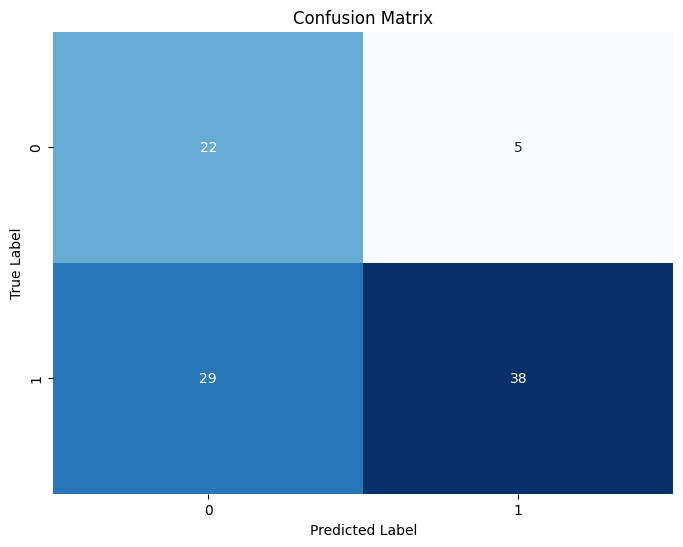

In [62]:
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='macro')
recall_svm = recall_score(y_test, y_pred, average='macro')
f1_svm = f1_score(y_test, y_pred, average='macro')

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

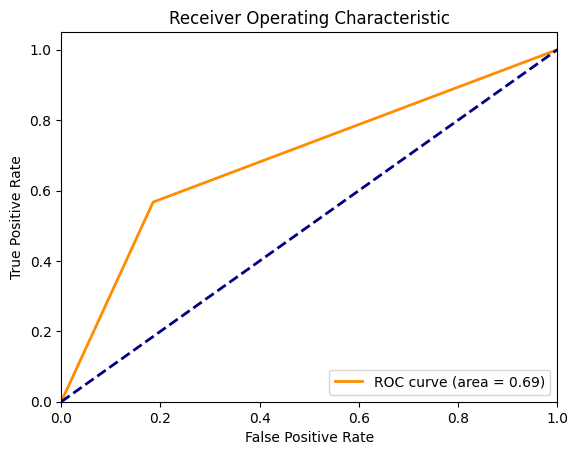

In [63]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# MLP

In [64]:
mlp_df = df_downsampled.copy()
mlp_df

,Company,Year,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,...,TRBC Industry Name,SGI,DEPI,GMI,AQI,SGAI,TATA,LVGI,M-Score,Status
0,SDU.HN,2019,962146079750,39747420090,12229981900,688192989410,8398774780,831044850,5472.379506,0.086299,...,"Real Estate Rental, Development & Operations",2.866046,0.049069,0.650212,0.845309,0.090855,0.082486,1.007259,5033.037070,Not Fraud
1,TPC.HM,2019,476425612950,249614687770,149423262920,330591735880,45549093670,21080874980,154.531020,1.175639,...,Non-Paper Containers & Packaging,0.094406,0.045022,0.946023,1.086551,0.058317,-0.077885,0.555354,137.800337,Not Fraud
2,HPG.HM,2023,82716439173040,106939256147180,97886180963800,71513492904730,3082017400020,6835064334360,104.098996,0.664323,...,Iron & Steel,-0.158803,0.059573,0.909889,1.006599,0.025910,-0.014041,1.102404,91.252723,Not Fraud
3,CLW.HM,2023,320290243150,950007460950,242777489190,257343718640,106245731080,46556460160,-10.919228,2.415073,...,Water & Related Utilities,0.040944,0.039787,1.239793,2.211968,0.081451,-0.103845,1.211166,-14.192298,Fraud
4,DRH.HM,2018,1613746407340,4613217250,3827624490,1384341819000,71442202870,65749948720,4070.878762,0.099350,...,"Real Estate Rental, Development & Operations",0.254719,0.142918,0.993064,0.514659,0.439227,-0.084290,2.273203,3740.131089,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,TNH.HM,2022,192762445740,1073188385630,972736879800,285727722410,27388020290,140575702200,7.724426,0.344952,...,Healthcare Facilities & Services,0.123022,0.037819,0.887468,0.809643,0.059133,-0.046736,1.067655,2.598264,Not Fraud
462,SRC.HM,2020,1049753919450,671263533610,58602924690,694148555520,119556179870,73515838380,138.910859,1.219875,...,Tires & Rubber Products,0.456100,0.030113,0.892147,1.128721,0.088608,0.063736,1.682410,124.028185,Not Fraud
463,GDW.HN,2016,50316320640,380097718590,173965142270,66695548440,153539861470,13092929930,-24.583657,2.071063,...,Water & Related Utilities,0.067030,0.050729,1.046134,1.880482,0.340756,-0.083879,1.176095,-26.914929,Fraud
464,ASP.HM,2021,983135322240,265448650370,85405533140,1305610537870,413928764100,25374646450,-1.023158,1.773687,...,Oil & Gas Refining and Marketing,0.245266,0.103411,0.818489,0.577767,0.122052,-0.132750,0.946388,-5.836656,Fraud


In [65]:
mlp_df.columns

Index(['Company', 'Year', 'Total Current Assets', 'PPE Total Gross',
       'PPE Total Net', 'Total Current Liabilities', 'SGAE',
       'Net Income Incl Extra Before Distributions', 'DSR', 'Asset Turnover',
       'Gross Profit Margin', 'Income Aft Tax Margin',
       'Cash from Operating Activities', 'Cash', 'Total Receivables',
       'Total Assets', 'Accounts Receivable', 'Total Inventory',
       'Total Long Term Debt', 'Notes Payable/Short Term Debt', 'Total Equity',
       'Total Revenue', 'Inventory Turnover', 'Fixed Asset Turnover',
       'WC/Sales, Period-Period Diff', 'Depreciation', 'Revenue',
       'Long Term Investments', 'TRBC Industry Name', 'SGI', 'DEPI', 'GMI',
       'AQI', 'SGAI', 'TATA', 'LVGI', 'M-Score', 'Status'],
      dtype='object')

In [66]:
mlp_df = mlp_df.drop(columns=['Year', 'TRBC Industry Name'])
mlp_df

,Company,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income Incl Extra Before Distributions,DSR,Asset Turnover,Gross Profit Margin,...,Long Term Investments,SGI,DEPI,GMI,AQI,SGAI,TATA,LVGI,M-Score,Status
0,SDU.HN,962146079750,39747420090,12229981900,688192989410,8398774780,831044850,5472.379506,0.086299,49.351455,...,87651968590,2.866046,0.049069,0.650212,0.845309,0.090855,0.082486,1.007259,5033.037070,Not Fraud
1,TPC.HM,476425612950,249614687770,149423262920,330591735880,45549093670,21080874980,154.531020,1.175639,9.057410,...,2000347400,0.094406,0.045022,0.946023,1.086551,0.058317,-0.077885,0.555354,137.800337,Not Fraud
2,HPG.HM,82716439173040,106939256147180,97886180963800,71513492904730,3082017400020,6835064334360,104.098996,0.664323,10.876428,...,633920277320,-0.158803,0.059573,0.909889,1.006599,0.025910,-0.014041,1.102404,91.252723,Not Fraud
3,CLW.HM,320290243150,950007460950,242777489190,257343718640,106245731080,46556460160,-10.919228,2.415073,12.817072,...,8330000,0.040944,0.039787,1.239793,2.211968,0.081451,-0.103845,1.211166,-14.192298,Fraud
4,DRH.HM,1613746407340,4613217250,3827624490,1384341819000,71442202870,65749948720,4070.878762,0.099350,50.879923,...,490333468280,0.254719,0.142918,0.993064,0.514659,0.439227,-0.084290,2.273203,3740.131089,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,TNH.HM,192762445740,1073188385630,972736879800,285727722410,27388020290,140575702200,7.724426,0.344952,45.444868,...,132888619460,0.123022,0.037819,0.887468,0.809643,0.059133,-0.046736,1.067655,2.598264,Not Fraud
462,SRC.HM,1049753919450,671263533610,58602924690,694148555520,119556179870,73515838380,138.910859,1.219875,16.069892,...,134776652220,0.456100,0.030113,0.892147,1.128721,0.088608,0.063736,1.682410,124.028185,Not Fraud
463,GDW.HN,50316320640,380097718590,173965142270,66695548440,153539861470,13092929930,-24.583657,2.071063,41.251836,...,325683170,0.067030,0.050729,1.046134,1.880482,0.340756,-0.083879,1.176095,-26.914929,Fraud
464,ASP.HM,983135322240,265448650370,85405533140,1305610537870,413928764100,25374646450,-1.023158,1.773687,13.245256,...,76820234460,0.245266,0.103411,0.818489,0.577767,0.122052,-0.132750,0.946388,-5.836656,Fraud


In [67]:
from torch.utils.data import TensorDataset, DataLoader

grouped_df = mlp_df.groupby('Company').agg({
    'DSR': 'mean',
    'GMI': 'mean',
    'AQI': 'mean',
    'SGI': 'mean',
    'DEPI': 'mean',
    'SGAI': 'mean',
    'TATA': 'mean',
    'LVGI': 'mean',
    'M-Score': 'mean',
    'Status': 'first'
}).reset_index()

# Encode the target variable
label_encoder = LabelEncoder()
grouped_df['Status'] = label_encoder.fit_transform(grouped_df['Status'])

# Convert DataFrame to PyTorch tensors
X = grouped_df[['DSR', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'TATA', 'LVGI']].values.astype(float)
y = grouped_df['Status'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 2  # Number of classes

# Initialize the model
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy: {accuracy:.4f}')

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [1/10], Loss: 0.7181
Epoch [2/10], Loss: 0.7878
Epoch [3/10], Loss: 1.1517
Epoch [4/10], Loss: 0.5282
Epoch [5/10], Loss: 0.5403
Epoch [6/10], Loss: 0.4485
Epoch [7/10], Loss: 0.4429
Epoch [8/10], Loss: 0.4115
Epoch [9/10], Loss: 0.2708
Epoch [10/10], Loss: 0.3980
Accuracy: 0.8776


Accuracy: 0.8776
Precision: 0.8776
Recall: 1.0000
F1 Score: 0.9348
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.88      1.00      0.93        43

    accuracy                           0.88        49
   macro avg       0.44      0.50      0.47        49
weighted avg       0.77      0.88      0.82        49



c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

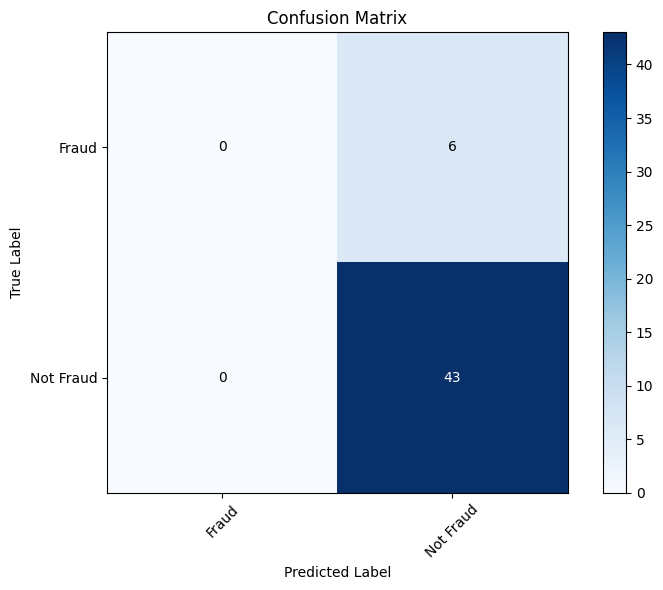

In [68]:
# Convert predictions to numpy arrays
y_pred = predicted.numpy()
y_true = y_test_tensor.numpy()

# Calculate metrics
accuracy_mlp = accuracy_score(y_true, y_pred)
precision_mlp = precision_score(y_true, y_pred)
recall_mlp = recall_score(y_true, y_pred)
f1_mlp = f1_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()

# Print metrics
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall: {recall_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print('Classification Report:')
print(classification_rep)

plt.show()

# 6 models comparison

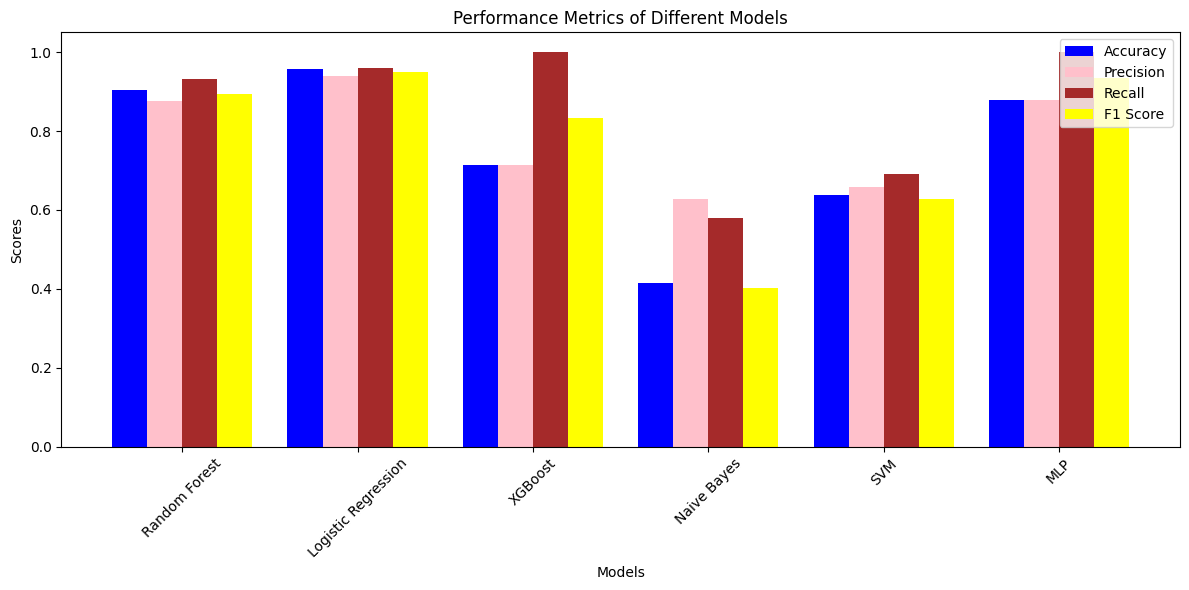

In [69]:
# Metrics for each model
models = ['Random Forest', 'Logistic Regression', 'XGBoost', 'Naive Bayes', 'SVM', 'MLP']

# Sample metrics (replace these with your actual metrics)
accuracy = [accuracy_rf, accuracy_lr, accuracy_xgb, accuracy_nb, accuracy_svm, accuracy_mlp]
precision = [precision_rf, precision_lr, precision_xgb, precision_nb, precision_svm, precision_mlp]
recall = [recall_rf, recall_lr, recall_xgb, recall_nb, recall_svm, recall_mlp]
f1_score = [f1_rf, f1_lr, f1_xgb, f1_nb, f1_svm, f1_mlp]

# Plotting the bar chart
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x, accuracy, width, label='Accuracy', color = 'blue')
bar2 = ax.bar([i + width for i in x], precision, width, label='Precision', color = 'pink')
bar3 = ax.bar([i + 2*width for i in x], recall, width, label='Recall', color = 'brown')
bar4 = ax.bar([i + 3*width for i in x], f1_score, width, label='F1 Score', color = 'yellow')


# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Models')
ax.set_xticks([i + 1.5 * width for i in x])
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
